In [62]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pd.read_csv('examination.txt', sep='\t')

X = data[['P1', 'P2']]
X1 = data[['P1']]
X2 = data[['P2']]
Y = data['F']

0     68
1     75
2     85
3     94
4     86
5     90
6     86
7     68
8     55
9     69
10    91
11    75
12    81
13    91
14    80
15    94
16    94
17    97
18    79
19    84
20    65
21    83
Name: F, dtype: int64

a) For each of the three models, draw the P-R plot. Identify all unusual observations (by number) and classify as outlier, high-leverage point, and/or influential observation.

Model 1: F = \beta_0 + \beta_1 P_1 +\epsilon
Model 2: F = \beta_0 + \beta_2 P_2 + \epsilon 
Model 3: F = \beta_0 + \beta_1 P_1 + \beta_2 P_2 + \epsilon

d_i = e_i / sqrt(SSE)
P = X (X^T X)^{-1} X^T  (Projection matrix. Also called hat matrix H.)

p_ii / (1 - p_{ii}) versus (1 + p) (d_i)^2 / [ (1 - (p_{ii})^2) (1 - (d_i)^2) ]

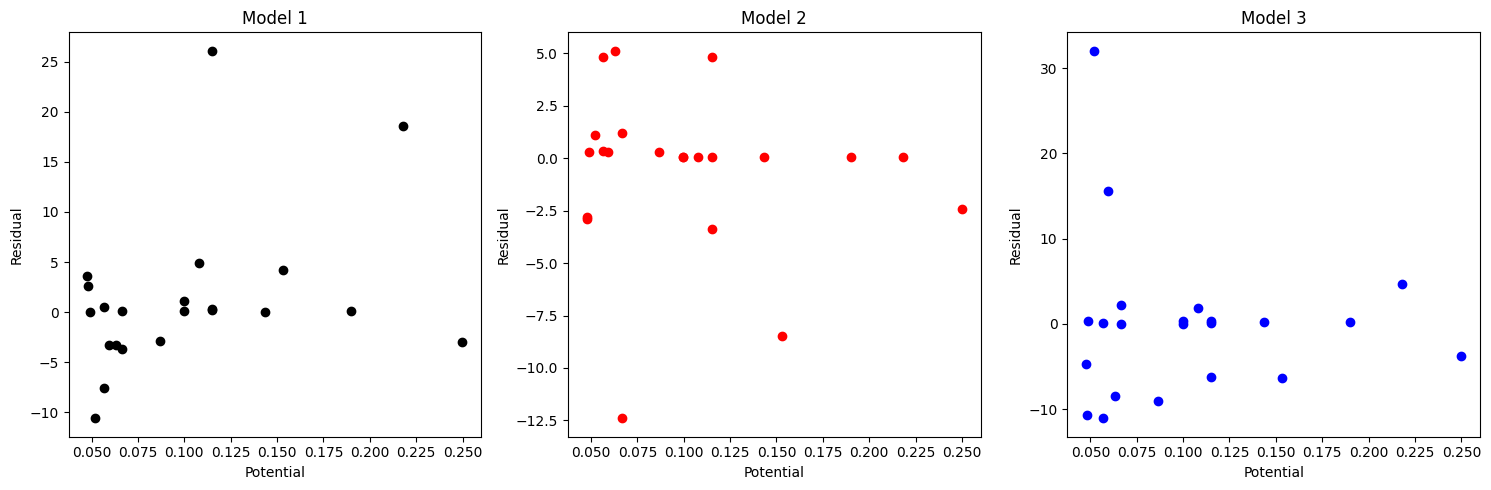

(22,)

In [75]:
X = sm.add_constant(X)  
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)

model_1 = sm.OLS(Y, X1).fit()
model_2 = sm.OLS(Y, X2).fit()
model_3 = sm.OLS(Y, X).fit()

leverage_model_1 = model_1.get_influence().hat_matrix_diag
leverage_model_2 = model_1.get_influence().hat_matrix_diag
leverage_model_3 = model_1.get_influence().hat_matrix_diag

d_ii_model_1 = model_1.get_influence().resid_studentized_internal 
d_ii_model_2 = model_2.get_influence().resid_studentized_internal
d_ii_model_3 = model_3.get_influence().resid_studentized_internal

potential_function_model_1 = leverage_model_1 / (1 - leverage_model_1)  # Calculate p_ii / (1 - p_ii) for model 1.
potential_function_model_2 = leverage_model_2 / (1 - leverage_model_2)
potential_function_model_3 = leverage_model_3 / (1 - leverage_model_3)

residual_function_model_1 = 2 * d_ii_model_1**2 / [ (1 - (leverage_model_1)**2) * (1 - d_ii_model_1**2) ] # p = 1
residual_function_model_2 = 2 * d_ii_model_2**2 / [ (1 - (leverage_model_2)**2) * (1 - d_ii_model_2**2) ] # p = 1
residual_function_model_3 = 3 * d_ii_model_3**2 / [ (1 - (leverage_model_3)**2) * (1 - d_ii_model_3**2) ] # p = 2

# Plot Potential versus Residuals 
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(potential_function_model_1, residual_function_model_1, color='black')
plt.xlabel('Potential')
plt.ylabel('Residual')
plt.title('Model 1')

plt.subplot(1, 3, 2)
plt.scatter(potential_function_model_2, residual_function_model_2, color='red')
plt.xlabel('Potential')
plt.ylabel('Residual')
plt.title('Model 2')

plt.subplot(1, 3, 3)
plt.scatter(potential_function_model_3, residual_function_model_3, color='blue')
plt.xlabel('Potential')
plt.ylabel('Residual')
plt.title('Model 3')

plt.tight_layout()
plt.show()

potential_function_model_3.shape

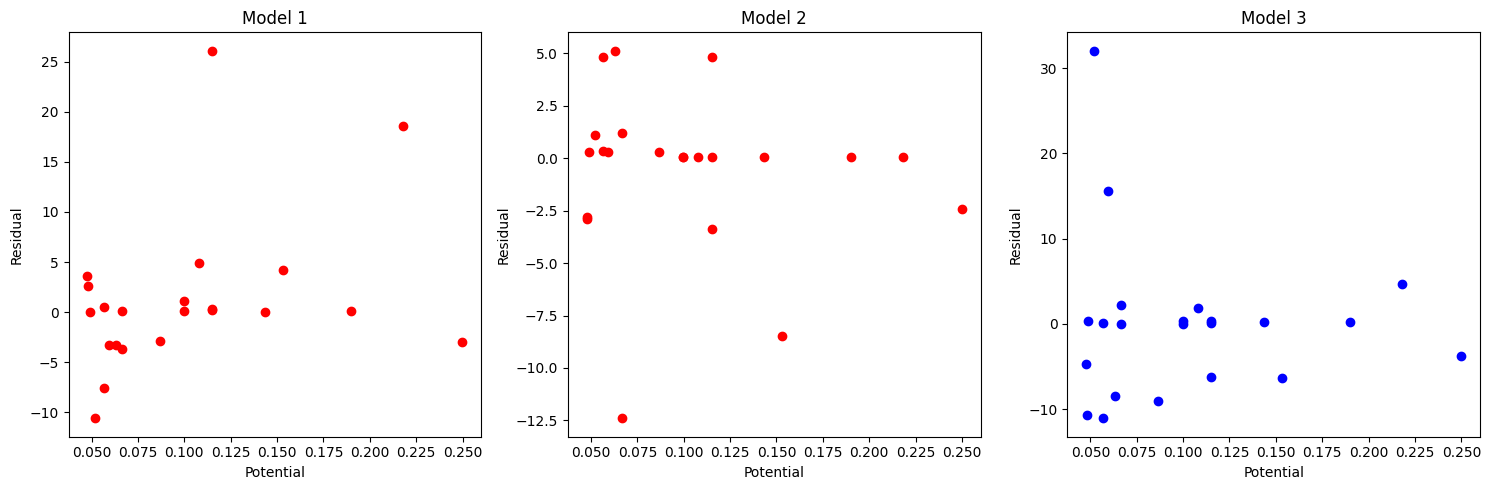

In [76]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(potential_function_model_1, residual_function_model_1, color='red')
plt.xlabel('Potential')
plt.ylabel('Residual')
plt.title('Model 1')


plt.subplot(1, 3, 2)
plt.scatter(potential_function_model_2, residual_function_model_2, color='red')
plt.xlabel('Potential')
plt.ylabel('Residual')
plt.title('Model 2')

plt.subplot(1, 3, 3)
plt.scatter(potential_function_model_3, residual_function_model_3, color='blue')
plt.xlabel('Potential')
plt.ylabel('Residual')
plt.title('Model 3')

plt.tight_layout()
plt.show()


(b) What model would you use to predict the final score F?